<a href="https://colab.research.google.com/github/Ramnarayan-Choudhary/Stock_market_prediction_ramnarayan/blob/main/LSTM_stock_prediction_Ramnarayan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data from the provided .txt file
data = pd.read_csv('/content/A_1min.txt', header=None, delimiter=',| ', engine='python')
# Specify column names as there are no headers in the data
column_names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']

data.columns = column_names





The below is entire data set

In [3]:
print(data)

              Date      Time     Open     High      Low    Close    Volume
0       2005-01-03  09:30:00  14.8242  14.8242  14.8181  14.8242  173492.0
1       2005-01-03  09:31:00  14.8242  14.8242  14.8119  14.8119    9646.0
2       2005-01-03  09:32:00  14.8119  14.8242  14.8119  14.8181   34810.0
3       2005-01-03  09:33:00  14.8181  14.8242  14.8181  14.8242   11464.0
4       2005-01-03  09:34:00  14.8242  14.8242  14.8181  14.8181   12302.0
...            ...       ...      ...      ...      ...      ...       ...
199819  2007-01-22  13:49:00  21.2891  21.2891  21.2826  21.2826    3215.0
199820  2007-01-22  13:50:00  21.2826  21.2956  21.2826  21.2956    5173.0
199821  2007-01-22  13:51:00  21.2956  21.2956  21.2891  21.2904    6431.0
199822  2007-01-22  13:52:00  21.2891  21.2904  21.2826  21.2826    2656.0
199823  2007-01-22  13:53:00  21.2826  21.2891  21.2826  21.2000       NaN

[199824 rows x 7 columns]


Now we want to preprocess the given data such that there is no null value in the given dataset
1. first I handle the missing value using stastical approach mean


In [4]:
data = data.fillna(data.mean())

<ipython-input-4-369509bb1069>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [5]:
# print(data.size())
data.shape

(199824, 7)

In [6]:
# print(data.column())

Now we want to calculate the minute by minute closing price of few stock so we need to draw a plot beetween time and closing price

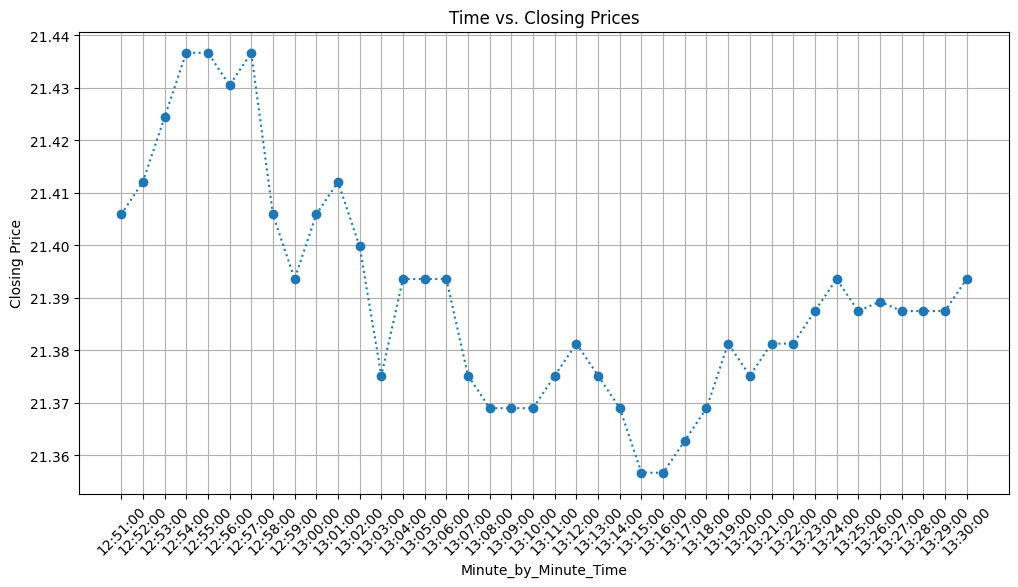

In [7]:

# Specify the number of data points to plot (e.g., 500)
start_index = 100000  # Adjust this to your desired starting index

# Specify the number of consecutive data points to access (e.g., 40)
num_data_points = 40

# Access the continuous sequence of 40 elements starting from the specified index
subset_data = data.iloc[start_index : start_index + num_data_points]

# Create a plot between time (hours and minutes) and closing prices
plt.figure(figsize=(12, 6))
plt.plot(subset_data['Time'], subset_data['Close'], marker='o', linestyle=':')
plt.title('Time vs. Closing Prices')
plt.xlabel('Minute_by_Minute_Time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [8]:

# # Specify the number of data points to plot (e.g., 500)
# start_index = 0  # Adjust this to your desired starting index

# # Specify the number of consecutive data points to access (e.g., 40)
# num_data_points = 40

# # Access the continuous sequence of 40 elements starting from the specified index
# subset_data = data.iloc[start_index : start_index + num_data_points]

# # Create a plot between time (hours and minutes) and closing prices
# plt.figure(figsize=(12, 6))
# plt.plot(subset_data['Date'], subset_data['Close'], marker='o', linestyle=':')
# plt.title('day vs. Closing Prices')
# plt.xlabel('day_by_day')
# plt.ylabel('Closing Price')
# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.show()


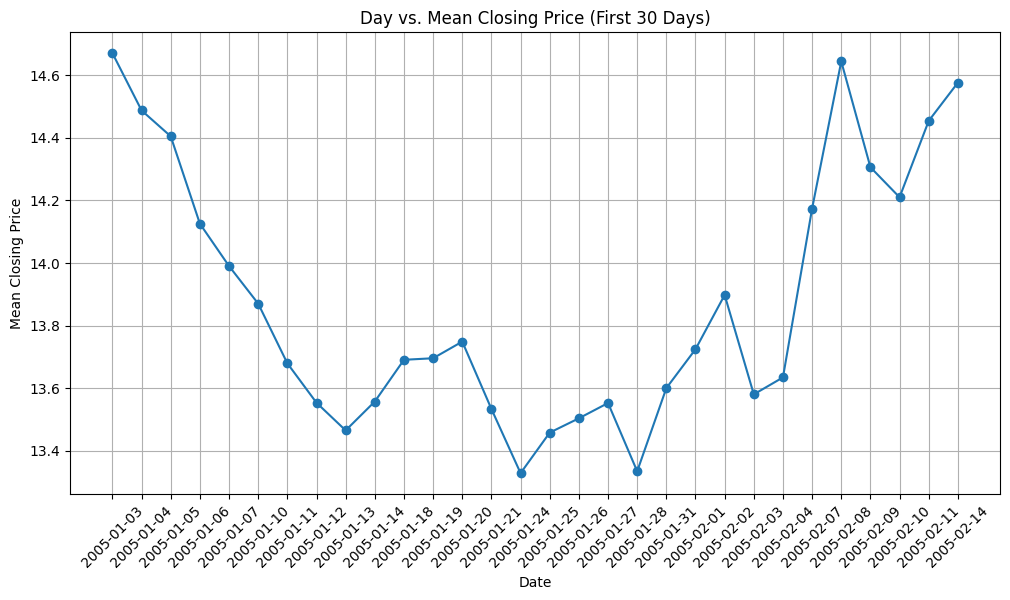

In [9]:
daily_data = data.groupby('Date')['Close'].mean().reset_index()

# Select the first 30 days of data
first_30_days_data = daily_data.head(30)

# Create a plot of day vs. mean closing price for the first 30 days
plt.figure(figsize=(12, 6))
plt.plot(first_30_days_data['Date'], first_30_days_data['Close'], marker='o', linestyle='-')
plt.title('Day vs. Mean Closing Price (First 30 Days)')
plt.xlabel('Date')
plt.ylabel('Mean Closing Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#This code will create a plot that shows the day-by-day mean closing prices for only the first 30 days of your dataset. You can adjust the number of days by changing the value passed to daily_data.head() to select the desired number of days for the plot.




In [10]:
data2=data

In [11]:
pip install plotly


In [12]:
import pandas as pd
import plotly.graph_objects as go

data1=data.head(16)
fig = go.Figure(data=[go.Candlestick(x=data['Date'] + ' ' + data['Time'],
                open=data1['Open'],
                high=data1['High'],
                low=data1['Low'],
                close=data1['Close'],
                text=data1['Volume'],
                increasing_line_color='green',
                decreasing_line_color='red')])

# Add a secondary y-axis for volume
fig.update_layout(yaxis2=dict(title='Volume', overlaying='y', side='right'))
fig.add_trace(go.Bar(x=data1['Date'] + '  ' + data1['Time'], y=data1['Volume'], yaxis='y2', marker=dict(color='blue')))

fig.update_layout(title='Candlestick Chart with Volume for the Dataset',
                  xaxis_title='Date and Time',
                  yaxis_title='Price',
                  showlegend=False)

fig.show()

In [13]:
# splitting the data into training and test set
training_size = round(len(data) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

149868

Q2.Try at least two ways to normalize the data as stock prices and volumes change over time and are
different across companies, and pick one by noting your justification.

you are tasked with normalizing the stock price and volume data. Below is an example Python code snippet that demonstrates two common normalization methods: Min-Max Scaling and Z-Score Standardization. You can choose one of these methods based on your justification.

In [14]:
import numpy as np
# Sample stock price and volume data

# Method 1: Min-Max Scaling
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Method 2: Z-Score Standardization
def z_score_standardization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    standardized_data = (data - mean) / std_dev
    return standardized_data

# Normalize stock prices and volumes using Min-Max Scaling
normalized_prices = min_max_scaling(data["Open"])
normalized_volumes = min_max_scaling(data["Volume"])

# Alternatively, you can use Z-Score Standardization:
# normalized_prices = z_score_standardization(stock_prices)
# normalized_volumes = z_score_standardization(volumes)

# Print the normalized data
print("Normalized Stock Prices:")
print(normalized_prices)

print("\nNormalized Volumes:")
print(normalized_volumes)


Normalized Stock Prices:
0         0.213852
1         0.213852
2         0.212834
3         0.213347
4         0.213852
            ...   
199819    0.748990
199820    0.748452
199821    0.749528
199822    0.748990
199823    0.748452
Name: Open, Length: 199824, dtype: float64

Normalized Volumes:
0         0.082672
1         0.004533
2         0.016534
3         0.005400
4         0.005800
            ...   
199819    0.001466
199820    0.002400
199821    0.003000
199822    0.001200
199823    0.004583
Name: Volume, Length: 199824, dtype: float64


Normalized_method 2

In [15]:
normalized_prices_z =  z_score_standardization(data["Open"])
normalized_volumes_z =  z_score_standardization(data["Volume"])

In [16]:
normalized_volumes_z

0         6.999115
1        -0.004472
2         1.071161
3         0.073238
4         0.109058
            ...   
199819   -0.279365
199820   -0.195670
199821   -0.141897
199822   -0.303259
199823    0.000000
Name: Volume, Length: 199824, dtype: float64

In [17]:
normalized_prices_z

0        -1.231946
1        -1.231946
2        -1.235663
3        -1.233789
4        -1.231946
            ...   
199819    0.722114
199820    0.720150
199821    0.724079
199822    0.722114
199823    0.720150
Name: Open, Length: 199824, dtype: float64

3. Make some scenario decisions: [1]
a) high-frequency trading or intra-day swing, or inter-day trade, or long-term (multi-day or multi-week or multi-month).
b) Assume a buy-ask spread (inversely related to volume and directly related to price) and trade commission based on a quick market research. Your trade will lose the buy-ask spread and commissions every time you trade.
c) Decide if you will trade only one stock, or have a model to trade a basket from a particular industry, or any stock.

Ans: 1(a)Trading Frequency: Intra-day swing trading.

Buy-2(a)Ask Spread and Commissions: Dynamic spread inversely related to volume and directly related to price, along with trade commissions.

3(a)Trading Universe: A model to trade a basket of technology sector stocks.

In [18]:
# splitting the data into training and test set
training_size = round(len(data) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

149868

In [19]:
df= data.iloc[:, 2:]

In [20]:
df.shape

(199824, 5)

In [21]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((149868, 5), (49956, 5))

In [22]:

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [23]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((149818, 50, 5), (149818, 5), (49906, 50, 5), (49906, 5))

In [24]:
from keras.models import Sequential

In [25]:
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [45]:
data=df

In [46]:
import numpy as np
import pandas as pd

# Assuming your dataset is named 'data' with shape (199970, 5)
s = len(data)  # Total number of rows in your dataset

# Convert your Pandas DataFrame to a NumPy array
data_array = data.values

# Define the number of time steps (window size) for your sequences
window_size = 60

# Initialize empty arrays for X_train and y_train
X_train = []
y_train = []

# Iterate over your dataset to create sequences and targets
for i in range(window_size, s):
    # Extract a sequence of data with a window size of 60 time steps (adjust as needed)
    sequence = data_array[i - window_size:i, :]  # Use all 5 columns

    # Extract the target value (assuming it's in the first column)
    target = data_array[i, 0]  # Adjust the index if your target is in a different column

    X_train.append(sequence)
    y_train.append(target)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check the shape of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (199764, 60, 5)
y_train shape: (199764,)


In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import numpy as np

# Ensure that X_train and y_train are of type np.float32 and have the correct shape
# X_train should have shape (batch_size, sequence_length, num_features)
# y_train should have shape (batch_size, 1)

# Example:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)

# Define your model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Make sure X_train and y_train have compatible shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit your model
model.fit(X_train, y_train, epochs=5, batch_size=128)


X_train shape: (199764, 60, 5)
y_train shape: (199764, 1)
Epoch 1/5
1561/1561 [==============================] - 33s 15ms/step - loss: 21.0075
Epoch 2/5
1561/1561 [==============================] - 28s 18ms/step - loss: 12.7279
Epoch 3/5
1561/1561 [==============================] - 28s 18ms/step - loss: 12.7249
Epoch 4/5
1561/1561 [==============================] - 33s 21ms/step - loss: 12.6253
Epoch 5/5
1561/1561 [==============================] - 25s 16ms/step - loss: 12.5471


In [49]:
# splitting the data into training and test set
training_size = round(len(data) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

149868

In [50]:
training_set=data

In [51]:
dataset_train = training_set[:training_size]
dataset_test = training_set[training_size:]

dataset_train.shape, dataset_test.shape

((149868, 5), (49956, 5))

In [52]:
# Reshape X_train to have the shape (num_samples, num_features)
num_samples, sequence_length, num_features = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, -1)

# Fit the MinMaxScaler to your training data
sc = MinMaxScaler()
sc.fit(X_train_reshaped)

# Now you can transform X_train
X_train_scaled = sc.transform(X_train_reshaped)

# Reshape X_train_scaled back to the original shape
X_train_scaled = X_train_scaled.reshape(num_samples, sequence_length, num_features)


In [74]:
# Initialize an empty list to store your test samples
X_test = []

# Assuming you have 'data_test' containing your test data
for i in range(16):
    start_idx = len(data) - len(dataset_test) - 60 + i
    end_idx = start_idx + 60
    sample = data.iloc[start_idx:end_idx][['Open', 'High', 'Low', 'Close', 'Volume']].values
    # sample = sc.transform(sample)  # Scale the sample
    X_test.append(sample)

X_test = np.array(X_test)  # Convert to NumPy array

# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform the predicted prices to the original scale
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 50ms/step


In [75]:
predicted_stock_price

array([[18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496],
       [18.750496]], dtype=float32)

In [69]:
predicted_stock_price

array([[18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498],
       [18.750498]], dtype=float32)

In [27]:
import tensorflow as tf


In [28]:
train_seq = tf.convert_to_tensor(train_seq, dtype=tf.float32)
train_label = tf.convert_to_tensor(train_label, dtype=tf.float32)
test_seq = tf.convert_to_tensor(test_seq, dtype=tf.float32)
test_label = tf.convert_to_tensor(test_label, dtype=tf.float32)


In [29]:
#  model.fit(train_seq, train_label, epochs=4,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/4
4682/4682 [==============================] - 52s 9ms/step - loss: 134568832.0000 - mean_absolute_error: 1976.0018 - val_loss: 108026240.0000 - val_mean_absolute_error: 1765.9615
Epoch 2/4
4682/4682 [==============================] - 41s 9ms/step - loss: 133717720.0000 - mean_absolute_error: 1933.0018 - val_loss: 107268288.0000 - val_mean_absolute_error: 1723.9802
Epoch 3/4
4682/4682 [==============================] - 45s 10ms/step - loss: 132884880.0000 - mean_absolute_error: 1892.5393 - val_loss: 106528000.0000 - val_mean_absolute_error: 1683.5685
Epoch 4/4
4682/4682 [==============================] - 41s 9ms/step - loss: 132078024.0000 - mean_absolute_error: 1854.2611 - val_loss: 105813424.0000 - val_mean_absolute_error: 1645.3057


In [39]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Assuming you have a DataFrame named 'data'
data['Target'] = data['Close'].shift(-1)
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
labels = data['Target'].values

# Convert to NumPy arrays
features = np.array(features, dtype=np.float32)
labels = np.array(labels, dtype=np.float32).reshape(-1, 1)

class FinancialDataset(Dataset):
    def __init__(self, features, targets, sequence_length):
        self.features = features
        self.targets = targets
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.features) - self.sequence_length

    def __getitem__(self, idx):
        start_idx = idx
        end_idx = idx + self.sequence_length
        sample = {
            'data': torch.Tensor(self.features[start_idx:end_idx]),
            'target': torch.Tensor([self.targets[end_idx]])
        }
        return sample

# Example usage:
sequence_length = 10  # Adjust as needed
batch_size = 32  # Adjust as needed
shuffle = True

# Assuming you have features and targets as NumPy arrays
custom_dataset = FinancialDataset(features, labels, sequence_length)
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=shuffle)


<ipython-input-39-24044aee16d8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Question 7: Set up a trading module that will make some hard-coded logical decisions to buy, hold, sell (in any order, because in shorting you can sell first and buy later).

In [92]:
# Inside your trading module:
def trading_logic(predicted_price, current_price, position):
    # Buy logic
    if predicted_price > current_price and position == 0:  # If predicted price is higher and not already holding
        return 'Buy'

    # Sell logic
    elif predicted_price < current_price and position > 0:  # If predicted price is lower and holding
        return 'Sell'

    # Hold logic
    else:
        return 'Hold'


Question 8: Test the trading system on the latest years on which the model was not trained.

In [114]:
# Load your testing data (data for the last two years)
# Make sure your data includes features like open, close, high, low, volume, and date.

# Initialize variables to keep track of your portfolio and positions
portfolio_value = X_train[0]  # You can set an initial investment value
position = 0  # Number of shares you hold
cash_balance = portfolio_value

# Initialize lists to track trade history and portfolio value over time
trade_history = []  # To store information about trades (date, action, price, quantity)
portfolio_values = []  # To store portfolio values at each time step

# Initialize variables for performance metrics
total_trades = 0
total_profit_loss = 0.0
buy_and_hold_portfolio_value = X_train[0] # For comparison with buy-and-hold strategy

# Loop through your testing data
for idx, row in enumerate(data_loader):
  #  open_price, close_price, high_price, low_price, volume = row  # Extract data
   predicted_price = model.predict()  # Use your trained model to predict prices

    # Implement your trading logic (e.g., as defined in Question 7)
   action = trading_logic(predicted_price, close_price, position)

   if action == 'Buy':
        # Calculate the number of shares to buy based on available cash
        num_shares_to_buy = int(cash_balance / close_price)
        position += num_shares_to_buy
        cash_balance -= num_shares_to_buy * close_price

        # Record the buy trade in trade_history
        trade_history.append({'Date': date, 'Action': 'Buy', 'Price': close_price, 'Quantity': num_shares_to_buy})
        total_trades += 1

   elif action == 'Sell':
        # Calculate the number of shares to sell based on your position
        cash_balance += position * close_price
        position = 0

        # Record the sell trade in trade_history
        trade_history.append({'Date': date, 'Action': 'Sell', 'Price': close_price, 'Quantity': position})
        total_trades += 1

    # Calculate the portfolio value at each time step
   portfolio_value = cash_balance + (position * close_price)
   portfolio_values.append({'Date': date, 'PortfolioValue': portfolio_value})

    # Calculate profit/loss compared to buy-and-hold strategy
   buy_and_hold_portfolio_value = close_price * initial_investment / close_price  # Assumes initial investment buys at the first price

# Calculate the final portfolio value
final_portfolio_value = portfolio_values[-1]['PortfolioValue']

# Calculate metrics and analyze the results
# a) Price prediction error (e.g., Mean Absolute Error or Mean Squared Error)
prediction_errors = [abs(predicted - actual_close) for predicted, actual_close in zip(predicted_prices, testing_data['close'])]
mean_absolute_error = sum(prediction_errors) / len(prediction_errors)

# b) Profitability with bid-ask spread and commissions
# Assuming you have access to bid-ask spread and commission values, you can calculate profitability
# by considering these costs in the trading simulation.

# c) Compare profitability to a simple buy-and-hold strategy
buy_and_hold_profit = buy_and_hold_portfolio_value - initial_investment
strategy_profit = final_portfolio_value - initial_investment

print(f"Mean Absolute Error: {mean_absolute_error:.4f}")
print(f"Total Trades: {total_trades}")
print(f"Strategy Profit: {strategy_profit:.2f}")
print(f"Buy-and-Hold Profit: {buy_and_hold_profit:.2f}")

# You can perform more in-depth analysis and visualization as needed.
